<a href="https://colab.research.google.com/github/nhuang37/GNN_community_detection/blob/main/Experiment_real_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Utils

In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount("/content/drive")
%cd /content/drive/MyDrive/JHU/Luana

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/JHU/Luana


In [ ]:
import math
import random
import os
import numpy as np
import numpy.random as npr
import scipy as sp
from scipy.sparse.linalg import eigsh, eigs
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from scipy.sparse.linalg import eigsh, eigs
from scipy.sparse.linalg.eigen.arpack import ArpackError
from torch.nn.utils.parametrizations import orthogonal
import pickle
import seaborn as sns
import copy
from collections import defaultdict


In [ ]:
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


1.12.1+cu113
     |████████████████████████████████| 7.9 MB 41.9 MB/s 
     |████████████████████████████████| 3.5 MB 45.3 MB/s 
     |████████████████████████████████| 2.4 MB 57.5 MB/s 


In [ ]:
#source: https://gist.github.com/ihincks/6a420b599f43fcd7dbd79d56798c4e5a
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

#### Bash script to run experiments

In [ ]:
!python sparsify.py --datasets amazon

Namespace(data_path='./dataset/', data_split='geom-gcn', datasets='amazon', depth=2, eval_every=1, poly_degree=4, result_path='./result/', sparsify_pct=0, spectral_dim=200, spectral_only=False)
dowloading photo
running model SP(100)
finish for model=SP(100), mean_acc=0.9183398938179016
running model SP(150)
finish for model=SP(150), mean_acc=0.9153594970703123
running model GNN(lin)
finish for model=GNN(lin), mean_acc=0.8834248554706573
running model GNN(non)
finish for model=GNN(non), mean_acc=0.851437929868698


In [ ]:
!python sparsify.py --datasets amazon --sparsify_pct 20

In [ ]:
!python sparsify.py --datasets amazon --sparsify_pct 50

#### Plot results on Amazon Photo

In [ ]:
result_d = pickle.load(open( "result/amazon0_4_.pkl", "rb" ) )
result_20 = pickle.load(open( "result/amazon20_4_.pkl", "rb" ) )
result_50 = pickle.load(open( "result/amazon50_4_.pkl", "rb" ) )


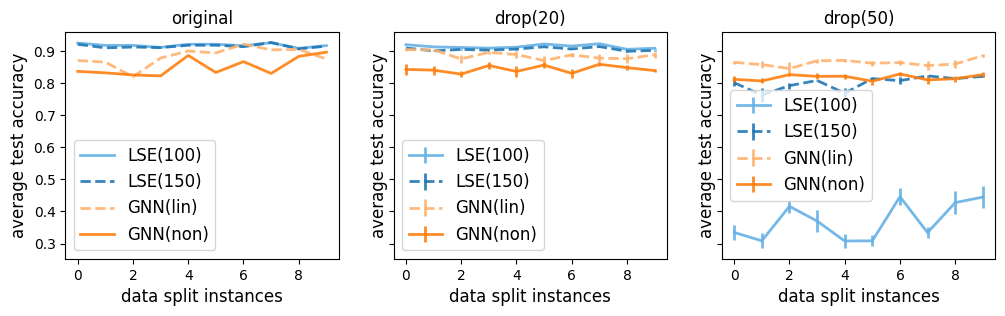

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(12,3), sharex=True, sharey=True, dpi=100)
names = ["original","drop(20)","drop(50)"]
colors = {'SP(100)': lighten_color('tab:blue', 0.6), 'SP(150)': 'tab:blue', 'GNN(lin)': lighten_color('tab:orange', 0.6), 'GNN(non)': 'tab:orange'}
styles = {'SP(100)':'-','SP(150)':'--', 'GNN(lin)':'--', 'GNN(non)':'-'}

for i, result in enumerate([result_d, result_20, result_50]):
  axs[i].set_title(names[i])
  for key, value in result['photo'].items():
    if i == 0:
      axs[i].plot(value, label=key, color=colors[key], alpha=0.9, linewidth=2, linestyle=styles[key])
    else:
      data= np.array(value)
      axs[i].errorbar(np.arange(10), data.mean(axis=0), yerr = data.std(axis=0)/np.sqrt(10), label=key, color=colors[key], alpha=0.9, linewidth=2, linestyle=styles[key])
  
  axs[i].legend(['LSE(100)', 'LSE(150)', 'GNN(lin)', 'GNN(non)'], fontsize=12) 
  axs[i].set_xlabel("data split instances", fontsize=12)
  axs[i].set_ylabel("average test accuracy", fontsize=12)
plt.show()